In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats

%matplotlib inline

In [2]:
bna_2022 = pd.read_csv('../data/bna_2022.csv')

In [3]:
headway = pd.read_csv('../data/Headway Data.csv')

In [4]:
bna_weather = pd.read_csv('../data/bna_weather.csv')

First we will look to see how many 'n/a' are in each data frame by coloumns and make a decision as to which columns to possible remove from the dataframes. 

Starting with the Headway dataframe. 

creating a new df to for headway with the agreed upon columns. 

In [5]:
headway_df = headway[['DATE', 'ROUTE_ABBR', 'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE','SCHEDULED_TIME', 'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE', 'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV']]

In [6]:
headway_df.isna().sum()

DATE                          0
ROUTE_ABBR                    0
BLOCK_ABBR                    0
OPERATOR                      0
TRIP_ID                       0
ROUTE_DIRECTION_NAME          0
TIME_POINT_ABBR               0
ROUTE_STOP_SEQUENCE          41
SCHEDULED_TIME                0
ACTUAL_ARRIVAL_TIME       54383
ACTUAL_DEPARTURE_TIME     54430
ADHERENCE                 54430
SCHEDULED_HDWY           432294
ACTUAL_HDWY              473824
HDWY_DEV                 474368
dtype: int64

now it's time to remove the nulls before renaming the columns.

In [7]:
headway_df2 = headway_df.dropna(how='any', axis=0)

1981715 - 1507318 = 474,397 (rows removed)

In [8]:
headway_df2.shape

(1507318, 15)

changing the columns names

headway_df2.columns = ['adh_id', 'date', 'rte_abbr', 'blk_abbr', 'opr', 'trip_id', 'rte_dir_name', 'time_pt_abbr', 'rte_stop_seq', 'lat', 'log', 'schd_time', 'act_arrvl_time', 'act_depart', 'adh', 'schd_hdwy', 'act_hdwy', 'hdwy_dev']

In [9]:
headway_df2.columns = ['date', 'rte_abbr', 'blk_abbr', 'operator', 'trip_id', 'rte_dir_name', 'time_pt_abbr', 'rte_stop_seq', 'schd_time', 'act_arrvl_time', 'act_depart', 'adh', 'schd_hdwy', 'act_hdwy', 'hdwy_dev']

In [10]:
headway_df2.head()

,date,rte_abbr,blk_abbr,operator,trip_id,rte_dir_name,time_pt_abbr,rte_stop_seq,schd_time,act_arrvl_time,act_depart,adh,schd_hdwy,act_hdwy,hdwy_dev
0,2021-11-01,7,1704,2088,297750,TO DOWNTOWN,HBHS,4.0,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333
1,2021-11-01,7,1704,2088,297750,TO DOWNTOWN,21BK,3.0,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333
12,2021-11-01,22,2200,1352,298128,TO DOWNTOWN,MHSP,15.0,05:42:00,05:33:39,05:43:03,-1.050000,35.0,34.633333,-0.366667
13,2021-11-01,22,2200,1352,298128,TO DOWNTOWN,ELIZ,11.0,05:46:00,05:48:15,05:48:15,-2.250000,35.0,35.866666,0.866666
14,2021-11-01,22,2200,1352,298128,TO DOWNTOWN,CV23,6.0,05:54:00,05:54:23,05:54:23,-0.383333,15.0,13.983333,-1.016667


In [11]:
headway_df2['date']

0          2021-11-01
1          2021-11-01
12         2021-11-01
13         2021-11-01
14         2021-11-01
              ...    
1981695    2022-11-01
1981696    2022-11-01
1981698    2022-11-01
1981699    2022-11-01
1981711    2022-11-01
Name: date, Length: 1507318, dtype: object

now to work on the bna weather cvs file. 

In [12]:
bna_weather2 = bna_weather[['Date', 'temp', 'wx_phrase']]

In [13]:
bna_weather2.head()

,Date,temp,wx_phrase
0,2021-11-01 00:53:00,51,Cloudy
1,2021-11-01 01:30:00,50,Partly Cloudy
2,2021-11-01 01:53:00,49,Fair
3,2021-11-01 02:53:00,48,Fair
4,2021-11-01 03:53:00,47,Fair


In [14]:
bna_weather2.columns = ['date', 'temp','wx_condition']

In [15]:
bna_weather2.head()

,date,temp,wx_condition
0,2021-11-01 00:53:00,51,Cloudy
1,2021-11-01 01:30:00,50,Partly Cloudy
2,2021-11-01 01:53:00,49,Fair
3,2021-11-01 02:53:00,48,Fair
4,2021-11-01 03:53:00,47,Fair


In [16]:
bna_weather2.isna().sum()

date            0
temp            0
wx_condition    0
dtype: int64

In [17]:
bna_weather2['date'].str[:10]

0       2021-11-01
1       2021-11-01
2       2021-11-01
3       2021-11-01
4       2021-11-01
           ...    
9734    2022-10-31
9735    2022-10-31
9736    2022-10-31
9737    2022-10-31
9738    2022-10-31
Name: date, Length: 9739, dtype: object

In [18]:
bna_weather2['date'] = bna_weather2['date'].str[:10]

C:\Users\aaust\AppData\Local\Temp\ipykernel_21848\2151395105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bna_weather2['date'] = bna_weather2['date'].str[:10]


In [19]:
bna_weather2.head()

,date,temp,wx_condition
0,2021-11-01,51,Cloudy
1,2021-11-01,50,Partly Cloudy
2,2021-11-01,49,Fair
3,2021-11-01,48,Fair
4,2021-11-01,47,Fair


now to merge the weather_bna dataframe to the headway dataframe.

In [20]:
wego_trips = headway_df2.merge(bna_weather2, on=['date'], how='outer')

In [21]:
wego_trips.head()

,date,rte_abbr,blk_abbr,operator,trip_id,rte_dir_name,time_pt_abbr,rte_stop_seq,schd_time,act_arrvl_time,act_depart,adh,schd_hdwy,act_hdwy,hdwy_dev,temp,wx_condition
0,2021-11-01,7,1704,2088,297750,TO DOWNTOWN,HBHS,4.0,14:10:00,13:59:21,14:12:00,-2.0,14.0,15.983333,1.983333,51.0,Cloudy
1,2021-11-01,7,1704,2088,297750,TO DOWNTOWN,HBHS,4.0,14:10:00,13:59:21,14:12:00,-2.0,14.0,15.983333,1.983333,50.0,Partly Cloudy
2,2021-11-01,7,1704,2088,297750,TO DOWNTOWN,HBHS,4.0,14:10:00,13:59:21,14:12:00,-2.0,14.0,15.983333,1.983333,49.0,Fair
3,2021-11-01,7,1704,2088,297750,TO DOWNTOWN,HBHS,4.0,14:10:00,13:59:21,14:12:00,-2.0,14.0,15.983333,1.983333,48.0,Fair
4,2021-11-01,7,1704,2088,297750,TO DOWNTOWN,HBHS,4.0,14:10:00,13:59:21,14:12:00,-2.0,14.0,15.983333,1.983333,47.0,Fair


In [22]:
wego_trips.isna().sum()

date                 0
rte_abbr             0
blk_abbr             0
operator             0
trip_id              0
rte_dir_name         0
time_pt_abbr         0
rte_stop_seq         0
schd_time            0
act_arrvl_time       0
act_depart           0
adh                  0
schd_hdwy            0
act_hdwy             0
hdwy_dev             0
temp              4998
wx_condition      4998
dtype: int64

In [23]:
operators = wego_trips[['date', 'operator', 'trip_id', 'rte_abbr', 'rte_dir_name','act_hdwy']]

In [24]:
operators

,date,operator,trip_id,rte_abbr,rte_dir_name,act_hdwy
0,2021-11-01,2088,297750,7,TO DOWNTOWN,15.983333
1,2021-11-01,2088,297750,7,TO DOWNTOWN,15.983333
2,2021-11-01,2088,297750,7,TO DOWNTOWN,15.983333
3,2021-11-01,2088,297750,7,TO DOWNTOWN,15.983333
4,2021-11-01,2088,297750,7,TO DOWNTOWN,15.983333
...,...,...,...,...,...,...
39992454,2022-11-01,375,329461,7,TO DOWNTOWN,16.850000
39992455,2022-11-01,375,329461,7,TO DOWNTOWN,14.500000
39992456,2022-11-01,375,329459,7,FROM DOWNTOWN,13.116666
39992457,2022-11-01,375,329459,7,FROM DOWNTOWN,7.483333


In [25]:
trip = operators.groupby(['date','trip_id', 'rte_abbr']).act_hdwy.agg({'mean' ,'std'})

In [26]:
trip = operators.merge(trip, left_on=['date','trip_id', 'rte_abbr'], right_index=True)

In [27]:
trip

,date,operator,trip_id,rte_abbr,rte_dir_name,act_hdwy,std,mean
0,2021-11-01,2088,297750,7,TO DOWNTOWN,15.983333,0.681853,16.658333
1,2021-11-01,2088,297750,7,TO DOWNTOWN,15.983333,0.681853,16.658333
2,2021-11-01,2088,297750,7,TO DOWNTOWN,15.983333,0.681853,16.658333
3,2021-11-01,2088,297750,7,TO DOWNTOWN,15.983333,0.681853,16.658333
4,2021-11-01,2088,297750,7,TO DOWNTOWN,15.983333,0.681853,16.658333
...,...,...,...,...,...,...,...,...
39992454,2022-11-01,375,329461,7,TO DOWNTOWN,16.850000,1.661701,15.675000
39992455,2022-11-01,375,329461,7,TO DOWNTOWN,14.500000,1.661701,15.675000
39992456,2022-11-01,375,329459,7,FROM DOWNTOWN,13.116666,3.983368,10.300000
39992457,2022-11-01,375,329459,7,FROM DOWNTOWN,7.483333,3.983368,10.300000


In [50]:
trip.drop_duplicates()

,date,operator,trip_id,rte_abbr,rte_dir_name,act_hdwy,std,mean,month
0,2021-11-01,2088,297750,7,TO DOWNTOWN,15.983333,0.681853,16.658333,11
25,2021-11-01,2088,297750,7,TO DOWNTOWN,17.333333,0.681853,16.658333,11
50,2021-11-01,1352,298128,22,TO DOWNTOWN,34.633333,10.105434,28.161111,11
75,2021-11-01,1352,298128,22,TO DOWNTOWN,35.866666,10.105434,28.161111,11
100,2021-11-01,1352,298128,22,TO DOWNTOWN,13.983333,10.105434,28.161111,11
...,...,...,...,...,...,...,...,...,...
39992454,2022-11-01,375,329461,7,TO DOWNTOWN,16.850000,1.661701,15.675000,11
39992455,2022-11-01,375,329461,7,TO DOWNTOWN,14.500000,1.661701,15.675000,11
39992456,2022-11-01,375,329459,7,FROM DOWNTOWN,13.116666,3.983368,10.300000,11
39992457,2022-11-01,375,329459,7,FROM DOWNTOWN,7.483333,3.983368,10.300000,11


In [73]:
# trip['month'] = trip['date'].month

# How do you extract the month and year from a date in Python?
# There is two steps to extract year for all the dataframe without using method apply.

# Step1. convert the column to datetime : df['ArrivalDate']=pd.to_datetime(df['ArrivalDate'], format='%Y-%m-%d')
# Step2. extract the year or the month using DatetimeIndex() method pd.DatetimeIndex(df['ArrivalDate']).year.

# sales_data['Order_Month'] = pd.to_datetime(sales_data['Order Date']).dt.month--winner
# trip['month'] = pd.to_datetime(trip['date']).dt.month

trip['day'] = pd.to_datetime(trip['date']).dt.dayofweek

In [74]:
trip

,date,operator,trip_id,rte_abbr,rte_dir_name,act_hdwy,std,mean,month,day
0,2021-11-01,2088,297750,7,TO DOWNTOWN,15.983333,0.681853,16.658333,11,0
1,2021-11-01,2088,297750,7,TO DOWNTOWN,15.983333,0.681853,16.658333,11,0
2,2021-11-01,2088,297750,7,TO DOWNTOWN,15.983333,0.681853,16.658333,11,0
3,2021-11-01,2088,297750,7,TO DOWNTOWN,15.983333,0.681853,16.658333,11,0
4,2021-11-01,2088,297750,7,TO DOWNTOWN,15.983333,0.681853,16.658333,11,0
...,...,...,...,...,...,...,...,...,...,...
39992454,2022-11-01,375,329461,7,TO DOWNTOWN,16.850000,1.661701,15.675000,11,1
39992455,2022-11-01,375,329461,7,TO DOWNTOWN,14.500000,1.661701,15.675000,11,1
39992456,2022-11-01,375,329459,7,FROM DOWNTOWN,13.116666,3.983368,10.300000,11,1
39992457,2022-11-01,375,329459,7,FROM DOWNTOWN,7.483333,3.983368,10.300000,11,1


In [75]:
trip.drop_duplicates()

,date,operator,trip_id,rte_abbr,rte_dir_name,act_hdwy,std,mean,month,day
0,2021-11-01,2088,297750,7,TO DOWNTOWN,15.983333,0.681853,16.658333,11,0
25,2021-11-01,2088,297750,7,TO DOWNTOWN,17.333333,0.681853,16.658333,11,0
50,2021-11-01,1352,298128,22,TO DOWNTOWN,34.633333,10.105434,28.161111,11,0
75,2021-11-01,1352,298128,22,TO DOWNTOWN,35.866666,10.105434,28.161111,11,0
100,2021-11-01,1352,298128,22,TO DOWNTOWN,13.983333,10.105434,28.161111,11,0
...,...,...,...,...,...,...,...,...,...,...
39992454,2022-11-01,375,329461,7,TO DOWNTOWN,16.850000,1.661701,15.675000,11,1
39992455,2022-11-01,375,329461,7,TO DOWNTOWN,14.500000,1.661701,15.675000,11,1
39992456,2022-11-01,375,329459,7,FROM DOWNTOWN,13.116666,3.983368,10.300000,11,1
39992457,2022-11-01,375,329459,7,FROM DOWNTOWN,7.483333,3.983368,10.300000,11,1


In [82]:
trip2 = trip[['date','rte_abbr', 'act_hdwy', 'day']]

In [84]:
trip2.drop_duplicates()

,date,rte_abbr,act_hdwy,day
0,2021-11-01,7,15.983333,0
25,2021-11-01,7,17.333333,0
50,2021-11-01,22,34.633333,0
75,2021-11-01,22,35.866666,0
100,2021-11-01,22,13.983333,0
...,...,...,...,...
39992453,2022-11-01,7,1.266666,1
39992455,2022-11-01,7,14.500000,1
39992456,2022-11-01,7,13.116666,1
39992457,2022-11-01,7,7.483333,1


In [86]:
trip2.groupby(pd.Grouper(key='date', axis=0,
                          freq='M')).sum()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

going to attempt to make a pivot tbl to see if there is a correlation between distance and headway

In [57]:
# pivot = trip.pivot_table(index =['trip_id', 'month'],
#                          values =['act_hdwy'],
#                          aggfunc ={'mean', 'median', 'min'})

In [58]:
# pivot

act_hdwy                      
                    mean     median        min
trip_id month                                 
297750  11     12.605582  12.366666   5.500000
298128  11     30.606961  34.633333  13.533333
298129  11     45.241023  59.550000   8.533333
298130  11     38.257407  19.600000  11.100000
298131  11     36.159129  22.900000  11.150000
...                  ...        ...        ...
329461  11     15.675000  15.675000  14.500000
329899  10      1.433333   1.433333   1.216666
330003  10      6.238974   5.216666   3.816666
        11      7.633333   7.633333   7.633333
330011  10      3.131229   2.950000   0.416666

[44585 rows x 3 columns]

In [45]:
# pivot.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 44585 entries, (297750, 11) to (330011, 10)
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (act_hdwy, mean)    44585 non-null  float64
 1   (act_hdwy, median)  44585 non-null  float64
 2   (act_hdwy, min)     44585 non-null  float64
dtypes: float64(3)
memory usage: 1.3 MB


KeyboardInterrupt: 

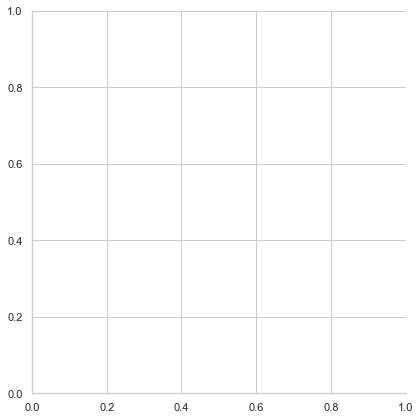

In [62]:
# sns.set_theme(style="whitegrid")

# # pivot = sns.load_dataset('pivot')

# # Draw a nested barplot by species and sex
# g = sns.catplot(
#     data=trip, kind="bar",
#     x='month', y='act_hdwy', hue='rte_abbr',
#     errorbar='sd', palette='dark', alpha=.6, height=6
# )
# g.despine(left=True)
# g.set_axis_labels("", 'Average Headway')
# g.legend.set_title("")
